# Analysis, Methodology, Results

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# LSE daily data: Description and exploratory

In [40]:
header_names = ['Symbol',
 'Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Ex-Dividend',
 'Split Ratio',
 'Adj. Open',
 'Adj. High',
 'Adj. Low',
 'Adj. Close',
 'Adj. Volume']

In [41]:
# Read HUGE csv that has all the daily LSE data from 1977
df = pd.read_csv('~/lse-data/lse/WIKI_20160909.csv', header=None, names=header_names)

Here is a data sample:

In [43]:
i = 1923200
df.iloc[i:i+50]

,Symbol,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
1923200,BP,1977-05-26,87.12,87.75,86.75,87.25,16700.0,0.0,1.0,2.267155,2.283549,2.257526,2.270538,267200.0
1923201,BP,1977-05-27,87.00,87.00,86.25,86.88,15100.0,0.0,1.0,2.264032,2.264032,2.244514,2.260909,241600.0
1923202,BP,1977-05-31,86.88,87.12,86.12,87.00,19100.0,0.0,1.0,2.260909,2.267155,2.241131,2.264032,305600.0
1923203,BP,1977-06-01,87.00,87.62,86.50,87.25,22700.0,0.0,1.0,2.264032,2.280166,2.251020,2.270538,363200.0
1923204,BP,1977-06-02,87.25,87.62,86.62,86.75,19100.0,0.0,1.0,2.270538,2.280166,2.254143,2.257526,305600.0
1923205,BP,1977-06-03,86.75,87.38,86.50,87.38,30600.0,0.0,1.0,2.257526,2.273921,2.251020,2.273921,489600.0
1923206,BP,1977-06-06,87.62,88.75,87.62,88.12,25200.0,0.0,1.0,2.280166,2.309573,2.280166,2.293178,403200.0
1923207,BP,1977-06-07,88.12,88.25,87.62,87.62,27900.0,0.0,1.0,2.293178,2.296561,2.280166,2.280166,446400.0
1923208,BP,1977-06-08,87.62,88.00,87.00,88.00,20700.0,0.0,1.0,2.280166,2.290055,2.264032,2.290055,331200.0
1923209,BP,1977-06-09,87.88,87.88,87.38,87.88,25200.0,0.0,1.0,2.286932,2.286932,2.273921,2.286932,403200.0


In [44]:
df.dtypes

Symbol          object
Date            object
Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
Ex-Dividend    float64
Split Ratio    float64
Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Close     float64
Adj. Volume    float64
dtype: object

Summary statistics across the entire dataset are not that informative:

In [45]:
df.describe()

/Users/jessica/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,1.432819e+07,1.432886e+07,1.432886e+07,1.432913e+07,1.432935e+07,1.432932e+07,1.432922e+07,1.432819e+07,1.432886e+07,1.432886e+07,1.432913e+07,1.432934e+07
mean,7.092291e+01,7.188109e+01,7.047024e+01,7.120251e+01,1.182026e+06,1.982789e-03,1.000210e+00,7.518079e+01,7.633755e+01,7.451613e+01,7.544570e+01,1.402925e+06
std,2.193723e+03,2.220224e+03,2.191789e+03,2.206792e+03,8.868551e+06,3.370723e-01,2.165061e-02,2.266636e+03,2.295340e+03,2.261718e+03,2.279264e+03,6.620816e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2.281800e+05,2.293740e+05,2.275300e+05,2.293000e+05,6.674913e+09,9.625000e+02,5.000000e+01,2.281800e+05,2.293740e+05,2.275300e+05,2.293000e+05,2.304019e+09


In [9]:
df.loc[:,'Daily Variation'] = df.loc[:,'High'] - df.loc[:,'Low']

# BP Data: Exploratory

* Total 10010 rows. 
* Start date: 1977 January 3
* End date: 2016 Sept 9

In [10]:
bp = df[1923099:1933109]

In [11]:
# Extract df with only BP data in it
bp = df[df['Symbol'] == 'BP']

# 1923099 - 1933108

In [13]:
bp.head()

,Symbol,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Variation
1923099,BP,1977-01-03,76.50,77.62,76.50,77.62,12400.0,0.0,1.0,1.990787,2.019933,1.990787,2.019933,198400.0,0
1923100,BP,1977-01-04,77.62,78.00,76.75,77.00,19300.0,0.0,1.0,2.019933,2.029822,1.997292,2.003798,308800.0,0
1923101,BP,1977-01-05,77.00,77.00,74.50,74.50,17900.0,0.0,1.0,2.003798,2.003798,1.938740,1.938740,286400.0,0
1923102,BP,1977-01-06,74.50,75.50,74.50,75.12,23900.0,0.0,1.0,1.938740,1.964763,1.938740,1.954874,382400.0,0
1923103,BP,1977-01-07,75.12,75.38,74.62,75.12,41700.0,0.0,1.0,1.954874,1.961640,1.941863,1.954874,667200.0,0


In [14]:
bp.tail()

,Symbol,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Variation
1933104,BP,2016-09-02,34.25,34.750,34.160,34.50,6896283.0,0.0,1.0,34.25,34.750,34.160,34.50,6896283.0,0
1933105,BP,2016-09-06,34.55,34.760,34.380,34.69,4090421.0,0.0,1.0,34.55,34.760,34.380,34.69,4090421.0,0
1933106,BP,2016-09-07,34.78,34.910,34.650,34.76,3902827.0,0.0,1.0,34.78,34.910,34.650,34.76,3902827.0,0
1933107,BP,2016-09-08,34.89,35.175,34.660,35.08,5161379.0,0.0,1.0,34.89,35.175,34.660,35.08,5161379.0,0
1933108,BP,2016-09-09,34.63,34.700,34.235,34.35,5434710.0,0.0,1.0,34.63,34.700,34.235,34.35,5434710.0,0


In [15]:
bp.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Variation
count,10010.000000,10010.000000,10010.000000,10010.000000,1.001000e+04,10010.000000,10010.000000,10010.000000,10010.000000,10010.000000,10010.000000,1.001000e+04,10010.0
mean,59.428433,59.908222,58.943809,59.446137,2.816082e+06,0.004626,1.000400,18.705367,18.855246,18.547576,18.707358,3.408274e+06,0.0
std,20.589378,20.676885,20.513272,20.598500,7.217241e+06,0.048270,0.019987,14.127674,14.228791,14.011973,14.122609,7.532096e+06,0.0
min,27.250000,27.850000,26.500000,27.020000,0.000000e+00,0.000000,1.000000,1.522366,1.528872,1.503109,1.522366,0.000000e+00,0.0
25%,44.750000,45.162500,44.250000,44.770000,1.831500e+05,0.000000,1.000000,5.426399,5.493816,5.373302,5.442764,7.536000e+05,0.0
50%,53.940000,54.360000,53.500000,53.940000,6.371500e+05,0.000000,1.000000,15.077767,15.165769,15.033179,15.099474,1.904100e+06,0.0
75%,69.750000,70.230000,69.327500,69.795000,3.784475e+06,0.000000,1.000000,31.849522,32.207689,31.524772,31.889513,4.051675e+06,0.0
max,147.120000,147.380000,146.380000,146.500000,2.408085e+08,0.840000,2.000000,50.669004,50.988683,50.039144,50.533702,2.408085e+08,0.0


In [16]:
bp.loc[:,'Daily Variation'] = bp.loc[:,'High'] - bp.loc[:,'Low']

/Users/jessica/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:
# Create additional features
# These features are not used in the current model
bp['Daily Variation'] = bp['High'] - bp['Low']
bp['Percentage Variation'] = bp['Daily Variation'] / bp['Open'] * 100
bp['Adj. Daily Variation'] = bp['Adj. High'] - bp['Adj. Low']
bp['Adj. Percentage Variation'] = bp['Adj. Daily Variation'] / bp['Adj. Open'] * 100

/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

## Plots

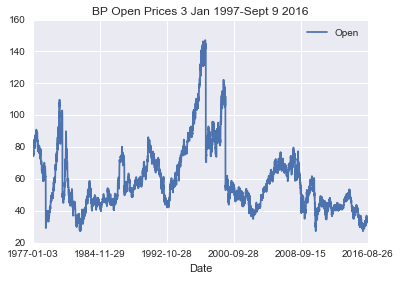

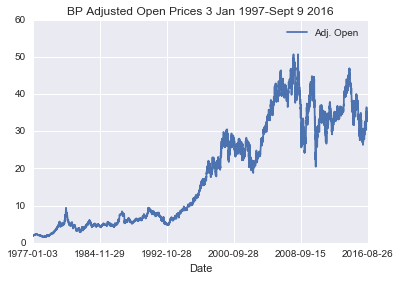

In [48]:
# Plot Open and Adjusted Open

bp.plot(x='Date', y='Open', title='BP Open Prices 3 Jan 1997-Sept 9 2016')
bp.plot(x='Date', y='Adj. Open', title='BP Adjusted Open Prices 3 Jan 1997-Sept 9 2016')

It is extraordinary: the adjusted open and the open are radically different for BP, whereas with stock 'A' in the first few rows of the df, Adj. Open and Open had similar values. We are predicting the Adjusted Close - my guess is that the Adjusted figures will be more useful in predicting the adjusted price. The non-adjusted figures may be good for predicting momentum though.

The stock price looks volatile. From the descriptive statistics, the mean daily percentage variation is 1.72% and the maximum daily percentage variation is 16.0%.

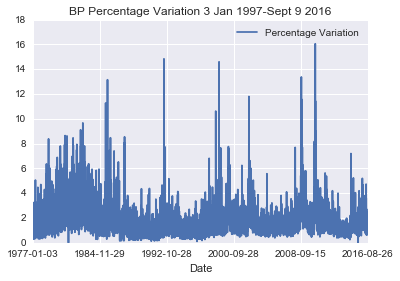

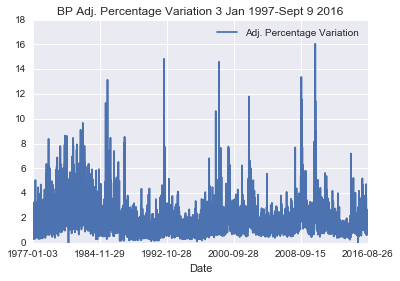

In [50]:
bp.plot(x='Date', y='Percentage Variation', title='BP Percentage Variation 3 Jan 1997-Sept 9 2016')
bp.plot(x='Date', y='Adj. Percentage Variation', title='BP Adj. Percentage Variation 3 Jan 1997-Sept 9 2016')

The Adjusted Percentage Variation and Percentage Variation look similar, however.

# Feature Engineering
x-day running averages


In [34]:
# N-day running averages
moving_average = 30

# 3-day, 7-day, 10-day, 14-day moving averages.
def n_day_moving_average(df, moving_average):
    # Create a column `N-day moving Average`.
    df['%s-day Moving Average' % str(moving_average)] = 0

    for i in range(moving_average, len(bp)):
        m_average = sum(df.iloc[i-moving_average:i]['Adj. Close'])/moving_average
        df.iloc[i].loc['%s-day Moving Average' % str(moving_average)] = m_average

n_day_moving_average(bp, 30)

/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jessica/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/jessica/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [39]:
bp.iloc[40].loc['%s-day Moving Average' % str(moving_average)]

0

In [ ]:
for i in range(moving_average, 40):
    bp.iloc[i].loc['%s-day Moving Average' % str(moving_average)] = m_average

In [36]:
bp.tail()['30-day Moving Average']

1933104    0
1933105    0
1933106    0
1933107    0
1933108    0
Name: 30-day Moving Average, dtype: int64

### Finding the stocks that are relevant to BP

In [ ]:
# Stock symbols:
China Petroleum and Chemical Corp: SNP,
GAIL (India): GAIA or GAID,
Gazprom: GAZ or 81jk or OGZD,
Green Dragon Gas Ltd: GDG,
Hellenic Petroleum SA: 98LQ or HLPD,
Lukoil PJSC: LKOE, LKOD or LKOH,
Magyar Olaj-es Gazipare Reszvenytar: MOLD,
Mando Machinery Corp: MNMD or 05IS,
Rosneft Oil Co: 40XT or ROSN,
Royal Dutch Shell: RDSA or RDSB,
Sacoil Hldgs Ltd: SAC,
Surgutneftegaz: SGGD,
Tatneft PJSC: ATAD,
Total SA: TTA,
Zoltav Resources Inc: ZOL

## Feat: FTSE 100

I scraped data from Google Finance.

In [1]:
ftse100_csv = pd.read_csv("ftse100-figures.csv")
ftse100_csv

NameError: name 'pd' is not defined

# Data Preprocessing

Raw cells because I've done this above.

### Build training and test sets

In [197]:
# Initialise variables
# Number of days prior that we consider
days = 7
# Number of train and test examples combined
periods = 9000

# Columns
columns = []
for j in range(1,days+1):
    columns.append('i-%s' % str(j))
columns.append('Adj. High')
columns.append('Adj. Low')
print(columns)

# Index
start_date = bp.iloc[days]["Date"]
print("Start date: ", start_date)
index = pd.date_range(start_date, periods=periods, freq='D')

# Create empty dataframes for features and prices
features = pd.DataFrame(index=index, columns=columns)
prices = pd.DataFrame(index=index, columns=["Target"])

# Prepare test and training sets
for i in range(periods):
    prices.iloc[i]['Target'] = bp.iloc[i+days]['Adj. Close']
    for j in range(days):
        features.iloc[i]['i-%s' % str(7-j)] = bp.iloc[i+j]['Adj. Close']
    features.iloc[i]['Adj. High'] = max(bp[i:i+days]['Adj. High'])
    features.iloc[i]['Adj. Low'] = min(bp[i:i+days]['Adj. Low'])
print(features.head())
print(prices.head())

['i-1', 'i-2', 'i-3', 'i-4', 'i-5', 'i-6', 'i-7', 'Adj. High', 'Adj. Low']
Start date:  1977-01-12
                i-1      i-2      i-3      i-4      i-5      i-6      i-7  \
1977-01-12  1.95175  1.96789  1.95487  1.95487  1.93874   2.0038  2.01993   
1977-01-13  1.93223  1.95175  1.96789  1.95487  1.95487  1.93874   2.0038   
1977-01-14  1.97777  1.93223  1.95175  1.96789  1.95487  1.95487  1.93874   
1977-01-15  1.95175  1.97777  1.93223  1.95175  1.96789  1.95487  1.95487   
1977-01-16  1.95826  1.95175  1.97777  1.93223  1.95175  1.96789  1.95487   

           Adj. High Adj. Low  
1977-01-12   2.02982  1.93874  
1977-01-13   2.02982  1.91272  
1977-01-14    2.0038  1.91272  
1977-01-15   1.98766  1.91272  
1977-01-16   1.98766  1.91272  
             Target
1977-01-12  1.93223
1977-01-13  1.97777
1977-01-14  1.95175
1977-01-15  1.95826
1977-01-16  1.94863


In [202]:
bp.iloc[:20][['Date', 'Adj. Close']]

,Date,Adj. Close
1923099,1977-01-03,2.019933
1923100,1977-01-04,2.003798
1923101,1977-01-05,1.938740
1923102,1977-01-06,1.954874
1923103,1977-01-07,1.954874
1923104,1977-01-10,1.967886
1923105,1977-01-11,1.951752
1923106,1977-01-12,1.932234
1923107,1977-01-13,1.977775
1923108,1977-01-14,1.951752


In [203]:
# N-day prices target

# Initialise variables
target_days = 7

# Create target dataframe
nday_columns = []
for j in range(1,target_days+1):
    nday_columns.append('Day %s' % str(j-1))
nday_prices = pd.DataFrame(index=index, columns=nday_columns)

# Fill target dataframe
for i in range(periods):
    for j in range(target_days):
        nday_prices.iloc[i]['Day %s' % str(j)] = bp.iloc[i+days+j]['Adj. Close']
nday_prices

,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6
1977-01-12,1.93223,1.97777,1.95175,1.95826,1.94863,2.0103,1.97777
1977-01-13,1.97777,1.95175,1.95826,1.94863,2.0103,1.97777,1.96789
1977-01-14,1.95175,1.95826,1.94863,2.0103,1.97777,1.96789,1.99079
1977-01-15,1.95826,1.94863,2.0103,1.97777,1.96789,1.99079,1.99391
1977-01-16,1.94863,2.0103,1.97777,1.96789,1.99079,1.99391,2.0038
1977-01-17,2.0103,1.97777,1.96789,1.99079,1.99391,2.0038,2.00068
1977-01-18,1.97777,1.96789,1.99079,1.99391,2.0038,2.00068,2.0038
1977-01-19,1.96789,1.99079,1.99391,2.0038,2.00068,2.0038,1.99079
1977-01-20,1.99079,1.99391,2.0038,2.00068,2.0038,1.99079,1.99729
1977-01-21,1.99391,2.0038,2.00068,2.0038,1.99079,1.99729,1.99729


In [206]:
# Train-test split
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, prices, test_size=0.2, random_state=0)

print("Train shapes (X,y): ", X_train.shape, y_train.shape)
print("Test shapes (X,y): ", X_test.shape, y_test.shape)

Train shapes (X,y):  (7200, 9) (7200, 1)
Test shapes (X,y):  (1800, 9) (1800, 1)


In [207]:
# Train-test split

Xnd_train, Xnd_test, ynd_train, ynd_test = train_test_split(train, nday_prices, test_size=0.2, random_state=0)

print("Train shapes (Xnd,ynd): ", Xnd_train.shape, ynd_train.shape)
print("Test shapes (Xnd,ynd): ", Xnd_test.shape, ynd_test.shape)

Train shapes (Xnd,ynd):  (7200, 9) (7200, 7)
Test shapes (Xnd,ynd):  (1800, 9) (1800, 7)


# Classifier

In [218]:
# Classifier

from sklearn import svm
# clf = svm.SVR()

from sklearn.multioutput import MultiOutputRegressor
clf = MultiOutputRegressor(svm.SVR(random_state=0))

clf.fit(Xnd_train, ynd_train)
pred = clf.predict(Xnd_test)

ImportError: cannot import name 'parallel_helper'

# Metrics

In [ ]:
# Metrics

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error

print("Mean Absolute Error: ", mean_absolute_error(y_test, pred))
print("Explained Variance Score: ", explained_variance_score(y_test, pred))
print("Mean Squared Error: ", mean_squared_error(y_test, pred))
print("R2 score: ", r2_score(y_test, pred))
print("Median Absolute Error: ", median_absolute_error(y_test, pred))

## Issues
If `train_test_split` shuffles, we may have seen some data in the test set before.